In [1]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import tensorflow as tf


np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/lo

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2023424/2110848 [===========================>..] - ETA: 0s

In [4]:
print len(train_data)
print len(test_data)

8982
2246


In [6]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

335872/550378 [=================>............] - ETA: 0s

u'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
one_hot_train_labels = keras.utils.np_utils.to_categorical(train_labels)
one_hot_test_labels = keras.utils.np_utils.to_categorical(test_labels)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

In [13]:
model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(
            partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3704 - a

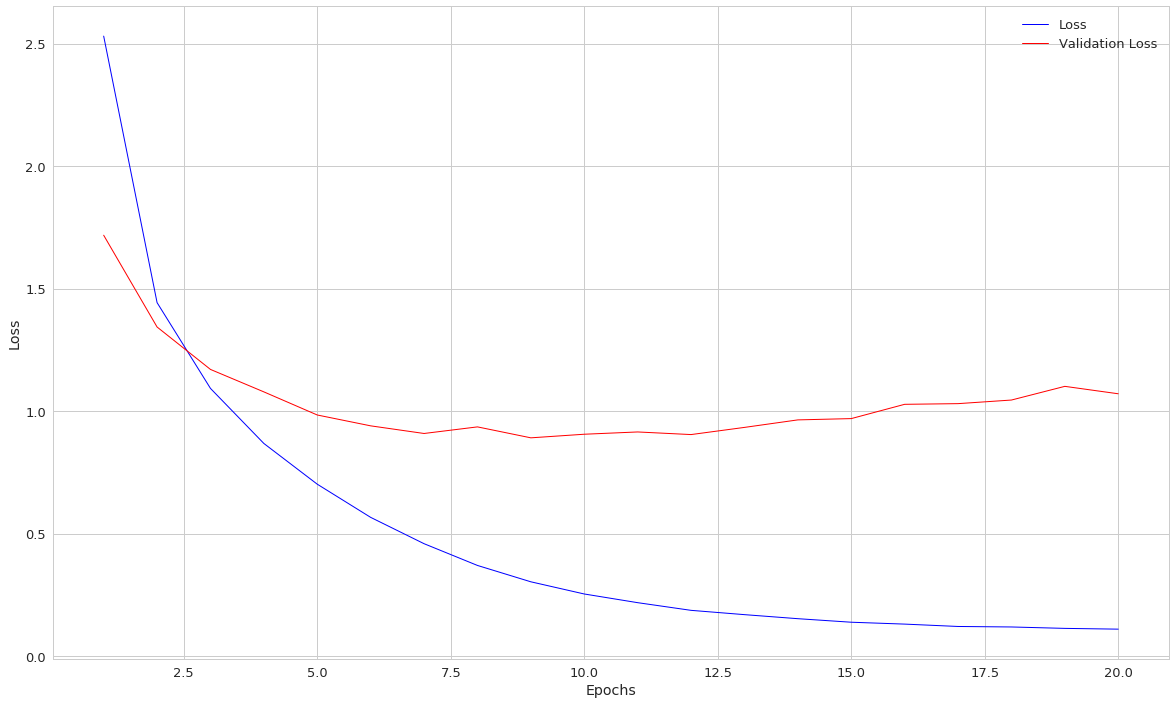

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

_ = plt.plot(epochs, loss_values, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss_values, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

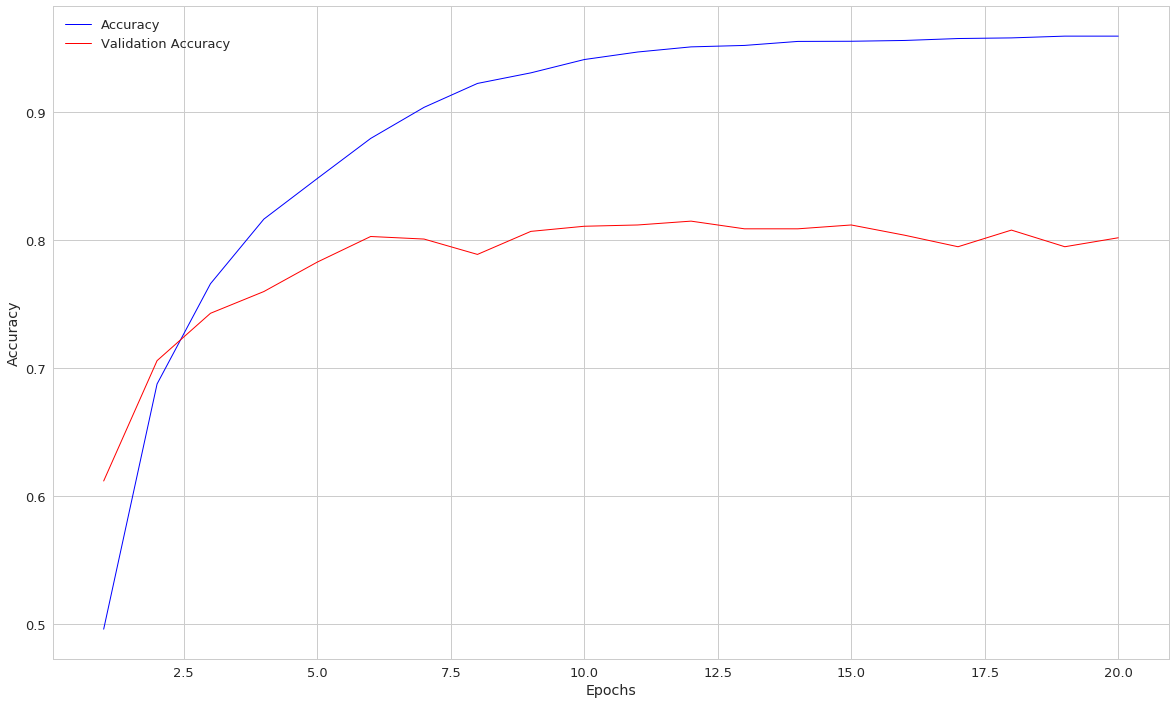

In [18]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

_ = plt.plot(epochs, acc_values, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

model.fit(
        x_train,
        one_hot_train_labels,
        epochs=9,
        batch_size=512,
        validation_data=(x_test, one_hot_test_labels))

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 0s - loss: 2.4405 - acc: 0.5164 - val_loss: 1.6432 - val_acc: 0.6563
Epoch 2/9
8982/8982 [==============================] - 0s - loss: 1.3167 - acc: 0.7126 - val_loss: 1.2860 - val_acc: 0.7110
Epoch 3/9
8982/8982 [==============================] - 0s - loss: 0.9782 - acc: 0.7908 - val_loss: 1.1482 - val_acc: 0.7502
Epoch 4/9
8982/8982 [==============================] - 0s - loss: 0.7699 - acc: 0.8398 - val_loss: 1.0813 - val_acc: 0.7502
Epoch 5/9
8982/8982 [==============================] - 0s - loss: 0.6134 - acc: 0.8732 - val_loss: 1.0109 - val_acc: 0.7743
Epoch 6/9
8982/8982 [==============================] - 0s - loss: 0.4907 - acc: 0.8997 - val_loss: 0.9501 - val_acc: 0.7787
Epoch 7/9
8982/8982 [==============================] - 0s - loss: 0.3968 - acc: 0.9172 - val_loss: 0.9542 - val_acc: 0.7872
Epoch 8/9
8982/8982 [==============================] - 0s - loss: 0.3257 - acc: 0.93

[0.96221541381795173, 0.78984861982155352]

In [22]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.17853962600178094

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
np.argmax(predictions[0])

3

In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
model.compile(
        optimizer='rmsprop',
        loss='sparse_categorical_crossentropy', 
        metrics=['acc'])

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

model.fit(
        x_train,
        one_hot_train_labels,
        epochs=10,
        batch_size=128,
        validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 1s - loss: 2.2888 - acc: 0.5284 - val_loss: 1.6160 - val_acc: 0.6006
Epoch 2/10
8982/8982 [==============================] - 1s - loss: 1.3420 - acc: 0.6701 - val_loss: 1.4171 - val_acc: 0.6456
Epoch 3/10
8982/8982 [==============================] - 1s - loss: 1.0543 - acc: 0.7418 - val_loss: 1.2299 - val_acc: 0.7075
Epoch 4/10
8982/8982 [==============================] - 1s - loss: 0.8603 - acc: 0.7796 - val_loss: 1.1988 - val_acc: 0.7182
Epoch 5/10
8982/8982 [==============================] - 1s - loss: 0.7073 - acc: 0.8273 - val_loss: 1.1787 - val_acc: 0.7337
Epoch 6/10
8982/8982 [==============================] - 1s - loss: 0.5854 - acc: 0.8612 - val_loss: 1.1892 - val_acc: 0.7418
Epoch 7/10
8982/8982 [==============================] - 1s - loss: 0.4933 - acc: 0.8859 - val_loss: 1.1947 - val_acc: 0.7467
Epoch 8/10
8982/8982 [==============================] - 1s - loss: 0.4207 - a